In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#setting hyperparameters
M=1200 #number of examples
EPOCHS=20000 
num_features=11 #length of input feature vector
learning_rate=0.01

In [3]:
x_train=np.random.randn(num_features,1200) #Initializing training set
W_act=np.random.randn(num_features,1) #Initializing actual weights
b_act=np.random.randn(1,1)
y_train=np.dot(W_act.T,x_train)+b_act 

In [4]:
#Initializing trainable weights
W=np.random.randn(num_features,1)
b=np.random.randn(1,1)

In [5]:
#Computes the MSE loss
def compute_loss(y, y_pred):
    loss = 1 / 2 * np.mean((y_pred - y)**2)
    return loss

In [6]:
#Takes the derivative of the loss functions
def derivative(y_true,y_pred):
    derivative=np.sign(y_pred-y_true)
    return derivative

In [7]:
#The training loop
losses=[]
for i in range(0,EPOCHS):
    preds=np.dot(W.T,x_train)+b
    dZ=derivative(y_train,preds)
    W_grad=((np.dot(x_train,dZ.T)))/M
    b_grad=(1/M)*(np.sum(dZ))
    W=W-learning_rate*W_grad
    b=b-learning_rate*b_grad
    loss=compute_loss(y_train,preds)
    losses.append(loss)
    

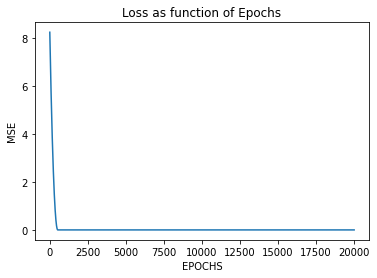

In [8]:
x=list(range(1,EPOCHS+1))
y=losses
plt.plot(x, y)
plt.xlabel('EPOCHS')
plt.ylabel('MSE')
plt.title('Loss as function of Epochs')
plt.show()

In [9]:
final_loss=losses[-1]
print(final_loss)

3.436706372662114e-05


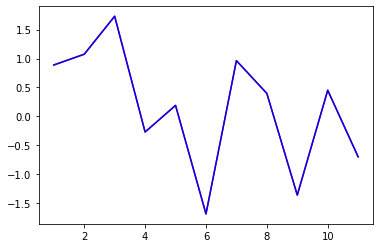

In [10]:
#A plot of actual weights against trainable weights. Actual weights are in  red and trainable weights in blue.
x=list(range(1,11+1))
plt.plot(x, W_act.tolist(), 'r') 
plt.plot(x, W.tolist(), 'b')  
plt.show()

In [11]:
# This loss applies a constant magnitude gradient for any difference between the true and predicted values. This means it does
# not suffer from the issue of exploding and vanishing gradients. But this also means that gradient descent can be very slow
# if the weights are very far from the true weights. Since it does not account for the distance, the initial values of the
# trainable weights must be somewhat close to the actual weights. In this case since, bothe the actual and trainabole weights
# are drawn the same gaussian distribution, we do not face this issue, However in a general problem, this may be major issue.

# Apart from this there is another problem with this loss. When the weights are very close to their true values, we do not 
# want major changes to the weights. We only want to gradually nudge the weights in the correct direction. However the
# constant gradient offered by this loss means there may be an 'overshooting' problem as the gradients over-correct the
# weights repeatedly preventing the loss from decresing beyond a certain value. The asymptote seen here is most probably
# a manifestation of that.